<h1>Getting the Names of the Community Areas and Their Geographic Coordinates</h1>

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests

response = requests.get(url="https://en.wikipedia.org/wiki/Community_areas_in_Chicago",)
print(response.status_code)

200


In [3]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, "lxml")

In [5]:
all_tables=soup.find_all("table")

In [6]:
right_table=soup.find('table', class_='wikitable sortable plainrowheaders')

In [7]:
A=[]
B=[]
for row in right_table.findAll('tr'):
    th=row.findAll('th')
    td=row.findAll('td')
    if len(th)>0 and len(td)>0:
        A.append(th[0].find(text=True).strip())
        B.append(td[4].find(text=True).strip())

In [8]:
del A[len(A)-1]
del B[len(B)-1]

In [9]:
import pandas as pd

In [10]:
A

['Rogers Park',
 'West Ridge',
 'Uptown',
 'Lincoln Square',
 'North Center',
 'Lake View',
 'Lincoln Park',
 'Near North Side',
 'Edison Park',
 'Norwood Park',
 'Jefferson Park',
 'Forest Glen',
 'North Park',
 'Albany Park',
 'Portage Park',
 'Irving Park',
 'Dunning',
 'Montclare',
 'Belmont Cragin',
 'Hermosa',
 'Avondale',
 'Logan Square',
 'Humboldt Park',
 'West Town',
 'Austin',
 'West Garfield Park',
 'East Garfield Park',
 'Near West Side',
 'North Lawndale',
 'South Lawndale',
 'Lower West Side',
 '(The)',
 'Near South Side',
 'Armour Square',
 'Douglas',
 'Oakland',
 'Fuller Park',
 'Grand Boulevard',
 'Kenwood',
 'Washington Park',
 'Hyde Park',
 'Woodlawn',
 'South Shore',
 'Chatham',
 'Avalon Park',
 'South Chicago',
 'Burnside',
 'Calumet Heights',
 'Roseland',
 'Pullman',
 'South Deering',
 'East Side',
 'West Pullman',
 'Riverdale',
 'Hegewisch',
 'Garfield Ridge',
 'Archer Heights',
 'Brighton Park',
 'McKinley Park',
 'Bridgeport',
 'New City',
 'West Elsdon',
 'Ga

In [11]:
B

['29,925.00',
 '21,590.65',
 '24,988.36',
 '16,294.92',
 '17,458.05',
 '32,201.92',
 '21,427.22',
 '32,442.70',
 '4,235.40',
 '8,487.19',
 '11,505.58',
 '5,943.44',
 '7,476.98',
 '27,079.17',
 '16,280.25',
 '17,011.21',
 '11,744.35',
 '13,969.70',
 '20,437.34',
 '20,635.90',
 '18,872.73',
 '20,347.08',
 '15,674.17',
 '18,450.22',
 '13,323.08',
 '13,408.59',
 '10,360.62',
 '11,049.56',
 '11,198.44',
 '16,307.41',
 '11,224.57',
 '21,745.45',
 '13,269.66',
 '13,455.00',
 '12,594.55',
 '11,456.90',
 '3,435.21',
 '12,823.56',
 '16,527.88',
 '7,567.11',
 '16,662.73',
 '11,240.58',
 '17,207.51',
 '10,549.15',
 '7,988.00',
 '8,461.98',
 '3,695.08',
 '7,536.00',
 '8,803.53',
 '3,119.34',
 '1,340.73',
 '7,965.44',
 '7,792.70',
 '2,094.62',
 '1,797.33',
 '8,604.26',
 '6,538.31',
 '16,475.37',
 '11,182.27',
 '16,094.26',
 '8,190.68',
 '16,441.88',
 '18,578.64',
 '10,153.33',
 '11,223.05',
 '15,041.93',
 '9,501.27',
 '8,167.75',
 '8,948.17',
 '9,010.70',
 '12,275.33',
 '6,547.80',
 '9,598.95',
 '7,

In [12]:
df=pd.DataFrame(A,columns=['Community Name'])

In [13]:
df

,Community Name
0,Rogers Park
1,West Ridge
2,Uptown
3,Lincoln Square
4,North Center
...,...
72,Washington Heights
73,Mount Greenwood
74,Morgan Park
75,O'Hare


In [14]:
df['Community Name'][31]='Chicago Loop'

In [15]:
df['Population Desnity(/sq mi)']=B

In [16]:
pip install geopandas

     |████████████████████████████████| 962 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 22.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 47.9 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 36.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [18]:
from geopy.geocoders import Nominatim

In [19]:
lat=[]
long=[]
locator = Nominatim(user_agent='myGeocoder')
for value in df['Community Name']:
    location = locator.geocode(value+',Chicago')
    lat.append(location.latitude)
    long.append(location.longitude)

In [20]:
df['Community Latitude']=lat
df['Community Longitude']=long

In [21]:
df

,Community Name,Population Desnity(/sq mi),Community Latitude,Community Longitude
0,Rogers Park,"29,925.00",42.010531,-87.670748
1,West Ridge,"21,590.65",42.003548,-87.696243
2,Uptown,"24,988.36",41.966630,-87.655546
3,Lincoln Square,"16,294.92",41.975990,-87.689616
4,North Center,"17,458.05",41.956107,-87.679160
...,...,...,...,...
72,Washington Heights,"9,598.95",41.706423,-87.656160
73,Mount Greenwood,"7,113.28",41.698089,-87.708662
74,Morgan Park,"6,786.06",41.690312,-87.666716
75,O'Hare,927.81,41.973101,-87.906768


<h1>Getting the Foursquare Location Data for The Different Community Areas</h1>

In [22]:
import json
from pandas.io.json import json_normalize

In [23]:
CLIENT_ID = 'YZ1NOSDNIKC4RBX5VT1ADHOT1FS4PC2VVN0AWDVPEAMM1TMD' 
CLIENT_SECRET = '0DUKLYAPBE40ZSHI3AYDSNB1RNBK233XLIQ50Q0ZKQBJQTBH' 
VERSION = '20180605' 
LIMIT = 100

In [24]:
def getNearbyVenues(names):
    
    venues_list=[]
    for name in (names.tolist()):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            name, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,  
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community Name',  
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
chicago_venues = getNearbyVenues(df['Community Name'])

Rogers Park
West Ridge
Uptown
Lincoln Square
North Center
Lake View
Lincoln Park
Near North Side
Edison Park
Norwood Park
Jefferson Park
Forest Glen
North Park
Albany Park
Portage Park
Irving Park
Dunning
Montclare
Belmont Cragin
Hermosa
Avondale
Logan Square
Humboldt Park
West Town
Austin
West Garfield Park
East Garfield Park
Near West Side
North Lawndale
South Lawndale
Lower West Side
Chicago Loop
Near South Side
Armour Square
Douglas
Oakland
Fuller Park
Grand Boulevard
Kenwood
Washington Park
Hyde Park
Woodlawn
South Shore
Chatham
Avalon Park
South Chicago
Burnside
Calumet Heights
Roseland
Pullman
South Deering
East Side
West Pullman
Riverdale
Hegewisch
Garfield Ridge
Archer Heights
Brighton Park
McKinley Park
Bridgeport
New City
West Elsdon
Gage Park
Clearing
West Lawn
Chicago Lawn
West Englewood
Englewood
Greater Grand Crossing
Ashburn
Auburn Gresham
Beverly
Washington Heights
Mount Greenwood
Morgan Park
O'Hare
Edgewater


In [26]:
chicago_venues.shape

(5159, 5)

In [27]:
chicago_venues.groupby('Community Name').count()

,Venue,Venue Latitude,Venue Longitude,Venue Category
Community Name,,,,
Albany Park,1,1,1,1
Archer Heights,100,100,100,100
Armour Square,100,100,100,100
Ashburn,99,99,99,99
Auburn Gresham,100,100,100,100
...,...,...,...,...
West Lawn,100,100,100,100
West Pullman,96,96,96,96
West Ridge,21,21,21,21


In [28]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 352 uniques categories.


In [29]:
chicago_venues.head()

,Community Name,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rogers Park,Rowlett Park,28.025015,-82.431707,Park
1,Rogers Park,Rogers Park Golf Course,28.019893,-82.426683,Golf Course
2,Rogers Park,Temple Crest Park,28.025126,-82.419121,Park
3,Rogers Park,RiverHills Dr & N 40th St Roundabout,28.021548,-82.414320,Intersection
4,Rogers Park,Rowlett Park (Dog park),28.026378,-82.429982,Dog Run


In [30]:
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add Community Name column back to dataframe
chicago_onehot['Community Name'] = chicago_venues['Community Name'] 

# move Community column to the first column
col_name="Community Name"
first_col = chicago_onehot.pop(col_name)
chicago_onehot.insert(0, col_name, first_col)
chicago_onehot.head()

,Community Name,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Service,American Restaurant,Antique Shop,...,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rogers Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
chicago_onehot.shape

(5159, 353)

In [32]:
chicago_grouped = chicago_onehot.groupby('Community Name').mean().reset_index()
chicago_grouped.head(10)

,Community Name,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Service,American Restaurant,Antique Shop,...,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Albany Park,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,Archer Heights,0.00,0.0,0.0,0.00,0.000000,0.0,0.02,0.010000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.010000,0.0,0.000000,0.0
2,Armour Square,0.00,0.0,0.0,0.01,0.000000,0.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.010000,0.0,0.000000,0.0
3,Ashburn,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.050505,0.0,...,0.0,0.0,0.0,0.010101,0.010101,0.0,0.010101,0.0,0.000000,0.0
4,Auburn Gresham,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
5,Austin,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.010000,0.0,0.000000,0.0,0.020000,0.0
6,Avalon Park,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
7,Avondale,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.022472,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
8,Belmont Cragin,0.01,0.0,0.0,0.00,0.000000,0.0,0.00,0.020000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
9,Beverly,0.00,0.0,0.0,0.00,0.011236,0.0,0.00,0.044944,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.011236,0.0,0.011236,0.0


In [33]:
chicago_grouped.shape

(77, 353)

In [34]:
import numpy as np

In [35]:
i=chicago_grouped.drop(['Community Name'], axis=1)

In [36]:
chicago_grouped.head(20)

,Community Name,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Service,American Restaurant,Antique Shop,...,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Albany Park,0.00,0.00,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000
1,Archer Heights,0.00,0.00,0.0,0.00,0.000000,0.0,0.02,0.010000,0.0,...,0.00,0.0,0.0,0.000000,0.000000,0.0,0.010000,0.00,0.000000,0.000000
2,Armour Square,0.00,0.00,0.0,0.01,0.000000,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.0,0.000000,0.000000,0.0,0.010000,0.00,0.000000,0.000000
3,Ashburn,0.00,0.00,0.0,0.00,0.000000,0.0,0.00,0.050505,0.0,...,0.00,0.0,0.0,0.010101,0.010101,0.0,0.010101,0.00,0.000000,0.000000
4,Auburn Gresham,0.00,0.00,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000
5,Austin,0.00,0.00,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.0,0.000000,0.010000,0.0,0.000000,0.00,0.020000,0.000000
6,Avalon Park,0.00,0.00,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000
7,Avondale,0.00,0.00,0.0,0.00,0.000000,0.0,0.00,0.022472,0.0,...,0.00,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000
8,Belmont Cragin,0.01,0.00,0.0,0.00,0.000000,0.0,0.00,0.020000,0.0,...,0.00,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000
9,Beverly,0.00,0.00,0.0,0.00,0.011236,0.0,0.00,0.044944,0.0,...,0.00,0.0,0.0,0.000000,0.000000,0.0,0.011236,0.00,0.011236,0.000000


In [37]:
def return_most_common_venues(row, num_top_venues):
    x=0
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    for i in range (num_top_venues):
        if row_categories_sorted[i] != 0:
            x=x+1
    if x != num_top_venues:
        row_categories_sorted.index.values[x:num_top_venues]='N/A'
    return row_categories_sorted.index.values[0:num_top_venues] 


In [38]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Community Name'] = chicago_grouped['Community Name']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Community Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Park,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,Archer Heights,Mexican Restaurant,Rental Car Location,Donut Shop,Pizza Place,Bar,Sandwich Place,Taco Place,Seafood Restaurant,Gas Station,Fast Food Restaurant
2,Armour Square,Chinese Restaurant,Bar,Pizza Place,Mexican Restaurant,Hot Dog Joint,Bakery,Korean Restaurant,Historic Site,Coffee Shop,Asian Restaurant
3,Ashburn,Coffee Shop,American Restaurant,Fast Food Restaurant,Seafood Restaurant,Grocery Store,Brewery,Bar,Thai Restaurant,Sushi Restaurant,Supermarket
4,Auburn Gresham,Sandwich Place,Discount Store,Bar,Seafood Restaurant,Grocery Store,Lounge,Cosmetics Shop,Donut Shop,Fried Chicken Joint,Fast Food Restaurant
5,Austin,Taco Place,Coffee Shop,Pizza Place,Park,BBQ Joint,Trail,Grocery Store,Bar,Movie Theater,Hotel
6,Avalon Park,Park,Home Service,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
7,Avondale,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Burger Joint,Asian Restaurant,Coffee Shop,Grocery Store,Gym,Bakery,Department Store
8,Belmont Cragin,Mexican Restaurant,Park,Grocery Store,Donut Shop,Greek Restaurant,Fast Food Restaurant,Pharmacy,Discount Store,Coffee Shop,Ice Cream Shop
9,Beverly,Italian Restaurant,Sandwich Place,Coffee Shop,American Restaurant,Chinese Restaurant,Park,Gym,Beach,Café,Pub


<h1>The K-Means Clustering Model</h1>

In [39]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!pip install folium
import folium 

     |████████████████████████████████| 93 kB 2.5 MB/s eta 0:00:011


<h5>Optimizing the model with different number of clusters to find the optimal point using the elbow point method</h5>

In [40]:
inertia=[]
n=[]
for i in range(21):
    kclusters =i+1
    chicago_grouped_clustering = chicago_grouped.drop('Community Name', 1)
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)
    # check cluster labels generated for each row in the dataframe
    inertia.append(kmeans.inertia_)
    n.append(kclusters)

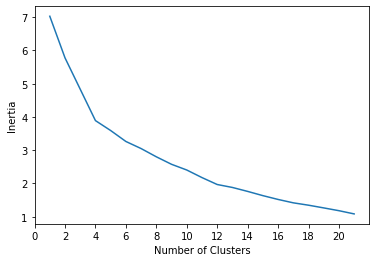

In [41]:
plt.plot(n,inertia)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0,21,2))
plt.show()


<h5>The elbow point seems to occur when the number of clusters=12 and so we will take this as the number of clusters for our model</h5>

In [42]:
kclusters = 12

chicago_grouped_clustering = chicago_grouped.drop('Community Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)


In [43]:
kmeans.labels_[0:50]

array([ 1,  9,  0,  0,  9,  0,  6,  9,  9,  0,  0,  0,  9,  9,  9,  9,  0,
        0,  9,  3,  0,  0,  0,  2,  0,  0,  4,  0,  9,  0,  9,  9,  9,  9,
        0,  5,  0,  0,  9,  9,  9,  0,  0,  0,  0, 11,  0, 10,  9,  9],
      dtype=int32)

In [44]:
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

chicago_merged = df

chicago_merged = chicago_merged.join(neighborhoods_venues_sorted.set_index('Community Name'), on='Community Name')

chicago_merged.head()

,Community Name,Population Desnity(/sq mi),Community Latitude,Community Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rogers Park,"29,925.00",42.010531,-87.670748,7,Park,Yoga Studio,Intersection,Dog Run,Golf Course,N/A,N/A,N/A,N/A,N/A
1,West Ridge,"21,590.65",42.003548,-87.696243,0,Pizza Place,College Cafeteria,Brewery,Liquor Store,Gas Station,Park,Grocery Store,Laundromat,Sandwich Place,Performing Arts Venue
2,Uptown,"24,988.36",41.966630,-87.655546,0,Coffee Shop,Vietnamese Restaurant,Grocery Store,Breakfast Spot,Chinese Restaurant,Beach,Mexican Restaurant,Bakery,Thai Restaurant,Middle Eastern Restaurant
3,Lincoln Square,"16,294.92",41.975990,-87.689616,9,Mexican Restaurant,Chinese Restaurant,Pizza Place,American Restaurant,Fast Food Restaurant,Discount Store,Pharmacy,Ice Cream Shop,BBQ Joint,Bar
4,North Center,"17,458.05",41.956107,-87.679160,0,Bar,Coffee Shop,Pizza Place,Dive Bar,Pub,Italian Restaurant,Brewery,Café,Chinese Restaurant,Salon / Barbershop


In [45]:
import numpy as np

In [46]:
# create map
latitude=41.881944   #Chicago Latitude and Longitude
longitude=-87.627778
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Community Latitude'], chicago_merged['Community Longitude'], chicago_merged['Community Name'], chicago_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h1>Next we will create clusters based on population density </h1>

In [47]:
population=chicago_merged['Population Desnity(/sq mi)'].values.tolist()

In [48]:
#converting the population density inputs from string to float after removing the commas from the values
pop=[]
for value in population:
    pop.append(float(value.replace(',', '')))

In [49]:
chicago_merged['Population Desnity(/sq mi)']=pop

In [50]:
minimum=min(pop)
maximum=max(pop)

In [51]:
minimum


927.81

In [52]:
maximum

32442.7

<h5>Now we will create 5 different bins of population density and map the community areas based on these bins

In [53]:
interval=(maximum-minimum)/5
int1=minimum+interval
int2=minimum+interval*2
int3=minimum+interval*3
int4=minimum+interval*4
a=[]
for value in chicago_merged['Population Desnity(/sq mi)']:
    if value<int1:
        a.append(1)
    elif value<int2:
        a.append(2)
    elif value<int3:
        a.append(3)
    elif value<int4:
        a.append(4)
    else:
        a.append(5)

In [54]:
chicago_merged['Population Bins']=a

In [62]:
# create map
latitude=41.881944   #Chicago Latitude and Longitude
longitude=-87.627778
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, pop in zip(chicago_merged['Community Latitude'], chicago_merged['Community Longitude'], chicago_merged['Community Name'], chicago_merged['Population Bins'],chicago_merged['Population Desnity(/sq mi)']):
    label = folium.Popup(str(poi) + '\n Population Desnity:  '+str(pop), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters
       

In [75]:
print(minimum)
print(int1)
print(int2)
print(int3)
print(int4)
print(maximum)

927.81
7230.7880000000005
13533.766
19836.744000000002
26139.722
32442.7


In [73]:
minimum

927.81